**Plan**

**1. Deploying TensorFlow models**

**2. Introduction to TensorFlow Serving**

**3. RESTful APIs for model serving**



**<h2>Deploying TensorFlow models</h2>**

Deploying TensorFlow models refers to the process of making trained machine learning models available for inference in a production environment. This involves serving the model so it can accept requests and return predictions.

**1. Saving a TensorFlow Model**

First, we need to save the trained model in a format that TensorFlow Serving can use.

In [ ]:
import tensorflow as tf
import numpy as np

# Define a simple model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model with dummy data
x_train = np.random.random((100, 4))
y_train = np.random.random((100, 1))
model.fit(x_train, y_train, epochs=5)

# Save the model
model.save('saved_model/my_model')

**2. Loading and Using the Saved Model**

We can load the saved model to verify it works as expected.

In [ ]:
# Load the saved model
loaded_model = tf.keras.models.load_model('saved_model/my_model')

# Predict with the loaded model
predictions = loaded_model.predict(x_train)
print(predictions[:5])

**<h2>Introduction to TensorFlow Serving</h2>**

TensorFlow Serving is a flexible, high-performance serving system for machine learning models designed for production environments. It allows you to deploy new algorithms and experiments while keeping the same server architecture and APIs.

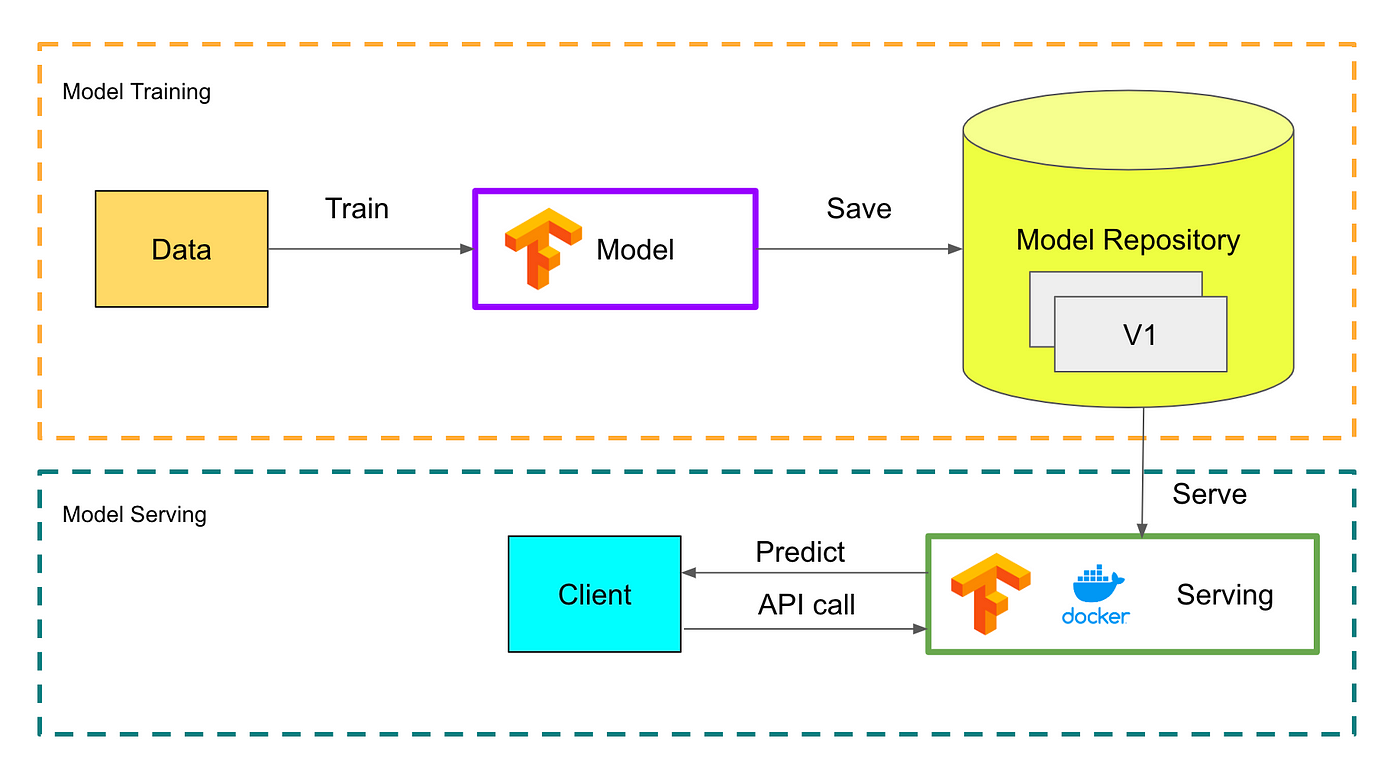

**1. Installing TensorFlow Serving**

TensorFlow Serving can be installed via Docker or as a standalone package. Here, we show how to install it using Docker.

In [ ]:
# Pull the TensorFlow Serving Docker image
docker pull tensorflow/serving

# Start a container serving the saved model
docker run -p 8501:8501 --name=tf_serving \
  --mount type=bind,source=$(pwd)/saved_model/my_model,target=/models/my_model \
  -e MODEL_NAME=my_model -t tensorflow/serving

**2. Sending Requests to TensorFlow Serving**

We can use curl to send REST requests to the TensorFlow Serving instance.

In [ ]:
# Make a prediction request with curl
curl -d '{"signature_name":"serving_default","instances":[[0.5, 0.5, 0.5, 0.5]]}' \
     -X POST http://localhost:8501/v1/models/my_model:predict

**3. Python Client for TensorFlow Serving**

A Python script to send requests to TensorFlow Serving.

In [ ]:
import requests
import json

# Define the URL for the model's predict endpoint
url = 'http://localhost:8501/v1/models/my_model:predict'

# Define the data payload
data = {
    "signature_name": "serving_default",
    "instances": [[0.5, 0.5, 0.5, 0.5]]
}

# Send the request
response = requests.post(url, data=json.dumps(data))
print(response.json())

**<h2>RESTful APIs for Model Serving</h2>**

RESTful APIs allow you to expose your model's inference capabilities over HTTP. This means you can integrate your model with any system capable of making HTTP requests.

**1. Basic REST API Request:**

Sending a simple REST API request to TensorFlow Serving.

In [ ]:
import requests
import json

url = 'http://localhost:8501/v1/models/my_model:predict'
data = {
    "signature_name": "serving_default",
    "instances": [[0.1, 0.2, 0.3, 0.4]]
}

response = requests.post(url, json=data)
print(response.json())

**2. Batch Predictions:**

Sending a batch of instances in one request.

In [ ]:
# Batch of instances
data = {
    "signature_name": "serving_default",
    "instances": [
        [0.1, 0.2, 0.3, 0.4],
        [0.5, 0.6, 0.7, 0.8],
        [0.9, 1.0, 1.1, 1.2]
    ]
}

response = requests.post(url, json=data)
print(response.json())

**3. Error Handling:**

Handling errors in the response from TensorFlow Serving.

In [ ]:
try:
    response = requests.post(url, json=data)
    response.raise_for_status()  # Raises an HTTPError if the HTTP request returned an unsuccessful status code
    predictions = response.json()
    print(predictions)
except requests.exceptions.HTTPError as err:
    print(f"HTTP error occurred: {err}")
except Exception as err:
    print(f"Other error occurred: {err}")

**4. Advanced Request with Custom Signature**

Using a custom signature for the prediction.

In [ ]:
# Assuming the model has a custom signature
data = {
    "signature_name": "custom_signature",
    "instances": [
        [0.1, 0.2, 0.3, 0.4]
    ]
}

response = requests.post(url, json=data)
print(response.json())